In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import math
import cv2
import matplotlib.pyplot as plt
import os
import seaborn as sns
import umap
from PIL import Image
from scipy import misc
from os import listdir
from os.path import isfile, join
import numpy as np
from scipy import misc
from random import shuffle
from collections import Counter
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D,AvgPool2D
from keras.layers import Activation, Dropout, Flatten, Dense
from keras.utils.np_utils import to_categorical

In [7]:
os.listdir('F:AIML/ANN/brain_tumor_dataset')

['no', 'yes']

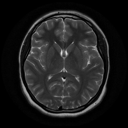

In [8]:
im =Image.open('F:/AIML/ANN/brain_tumor_dataset/no/1 no.jpeg').resize((128,128))
im

In [9]:
yes=os.listdir('F:/AIML/ANN/brain_tumor_dataset/yes')
no=os.listdir('F:/AIML/ANN/brain_tumor_dataset/no')
data=np.concatenate([yes,no])
len(data)==len(yes)+len(no)

True

In [10]:
target_x=np.full(len(yes),1)
target_y=np.full(len(no),0)
data_target=np.concatenate([target_x,target_y])
len(data_target)==len(target_x)+len(target_y)

True

In [11]:
data_target


array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [12]:
yes_values=os.listdir('F:/AIML/ANN/brain_tumor_dataset/yes')
no_values=os.listdir('F:/AIML/ANN/brain_tumor_dataset/no')
X_data =[]
for file in yes_values:
    #face = misc.imread('F:/AIML/ANN/brain_tumor_dataset/yes/'+file)
    img = cv2.imread('F:/AIML/ANN/brain_tumor_dataset/yes/'+file)
    face = cv2.resize(img, (32, 32) )
    (b, g, r)=cv2.split(face) 
    img=cv2.merge([r,g,b])
    X_data.append(img)
#X_data =[]
for file in no_values:
    #face = misc.imread('F:/AIML/ANN/brain_tumor_dataset/yes/'+file)
    img = cv2.imread('F:/AIML/ANN/brain_tumor_dataset/no/'+file)
    face = cv2.resize(img, (32, 32) )
    (b, g, r)=cv2.split(face) 
    img=cv2.merge([r,g,b])
    X_data.append(img)
len(X_data)==len(data)==len(data_target)

True

In [13]:
X = np.squeeze(X_data)
X.shape
# normalize data
X = X.astype('float32')
X /= 255

In [14]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X, data_target, test_size = 0.2, random_state = 0)

In [15]:
model = Sequential()
model.add(Conv2D(filters=32, kernel_size=(5,5), padding='same', activation='relu', input_shape=(32, 32, 3)))
model.add(MaxPooling2D(strides=2))
model.add(Conv2D(filters=48, kernel_size=(5,5), padding='valid', activation='relu'))
model.add(MaxPooling2D(strides=2))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(84, activation='relu'))
model.add(Dense(1, activation='softmax'))


model.build()
model.summary()


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 32)        2432      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 12, 12, 48)        38448     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 6, 6, 48)          0         
_________________________________________________________________
flatten (Flatten)            (None, 1728)              0         
_________________________________________________________________
dense (Dense)                (None, 256)               442624    
_________________________________________________________________
dense_1 (Dense)              (None, 84)                2

In [16]:
from tensorflow.keras.optimizers import Adam
adam = Adam(lr=5e-4)
model.compile(loss='binary_crossentropy', metrics=['accuracy'], optimizer=adam)

C:\Users\Windows\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:355: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


In [18]:
# Set a learning rate annealer
from keras.callbacks import ReduceLROnPlateau
reduce_lr = ReduceLROnPlateau(monitor='val_acc', 
                                patience=3, 
                                verbose=1, 
                                factor=0.2, 
                                min_lr=1e-6)

In [19]:
# Data Augmentation
from keras.preprocessing.image import ImageDataGenerator
datagen = ImageDataGenerator(
            rotation_range=10, 
            width_shift_range=0.1, 
            height_shift_range=0.1, 
            zoom_range=0.1)
datagen.fit(x_train)

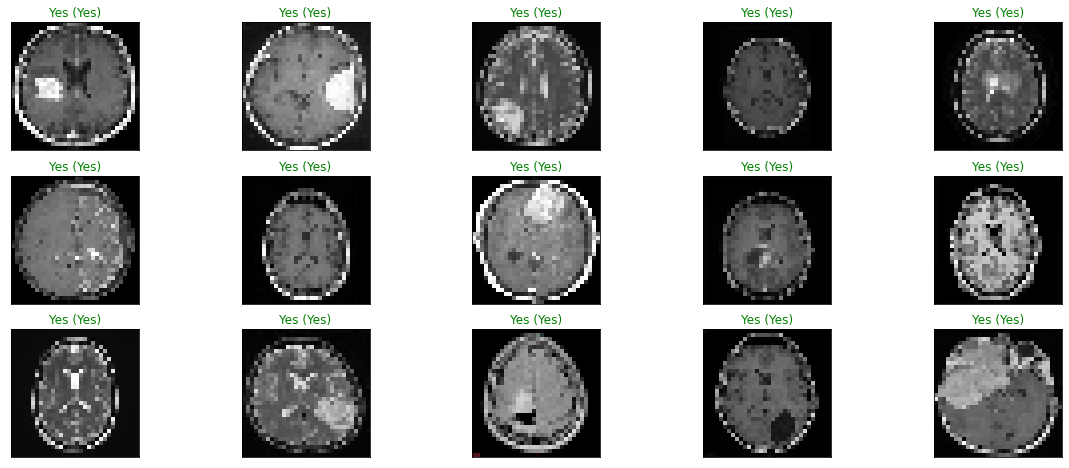

In [20]:
labels =["Yes",  # index 0
        "No",      # index 1
        ]
y_hat = model.predict(x_test)

# Plot a random sample of 10 test images, their predicted labels and ground truth
figure = plt.figure(figsize=(20, 8))
for i, index in enumerate(np.random.choice(x_test.shape[0], size=15, replace=False)):
    ax = figure.add_subplot(3, 5, i + 1, xticks=[], yticks=[])
    # Display each image
    ax.imshow(np.squeeze(x_test[index]))
    predict_index = np.argmax(y_hat[index])
    true_index = np.argmax(y_test[index])
    # Set the title for each image
    ax.set_title("{} ({})".format(labels[predict_index], 
                                  labels[true_index]),
                                  color=("green" if predict_index == true_index else "red"))
plt.show()

In [21]:
from sklearn import metrics

print(metrics.classification_report(y_test, y_hat, labels=np.unique(y_hat)))

              precision    recall  f1-score   support

         1.0       0.57      1.00      0.72        29

   micro avg       0.57      1.00      0.72        29
   macro avg       0.57      1.00      0.72        29
weighted avg       0.57      1.00      0.72        29



In [22]:
print(f"Accuracy Score: %{metrics.accuracy_score(y_test, y_hat,normalize=False)}")

Accuracy Score: %29
